# Data Analysis and Processing

### Librairies

In [1]:
import os
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import gc
from datetime import datetime 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from catboost import CatBoostClassifier
from sklearn import svm
import lightgbm as lgb
from lightgbm import LGBMClassifier
import xgboost as xgb
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    auc,
    cohen_kappa_score,
    matthews_corrcoef,
    f1_score
)


### Donwload dataset :

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Paul\.cache\kagglehub\datasets\mlg-ulb\creditcardfraud\versions\3


In [3]:
print(os.listdir(path))
df = pd.read_csv(f"{path}/creditcard.csv")

['creditcard.csv']


In [4]:
print(f"Shape : {df.shape}")

Shape : (284807, 31)


In [5]:
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [6]:
# Check df details

df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
# Check missing data

total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

# All 0 means there is no missing data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# Column names

df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
# Check unbalance dataset

df['Class'].value_counts()

# 284315 0 and 492 1 --> VERY unbalanced

Class
0    284315
1       492
Name: count, dtype: int64

In [10]:
# Check evolution of fraud across time

class_0 = df.loc[df['Class'] == 0]["Time"]
class_1 = df.loc[df['Class'] == 1]["Time"]

hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Evolution of fraud over time', xaxis=dict(title='Time [s]'))
iplot(fig, filename='dist_only')

<function matplotlib.pyplot.show(close=None, block=None)>

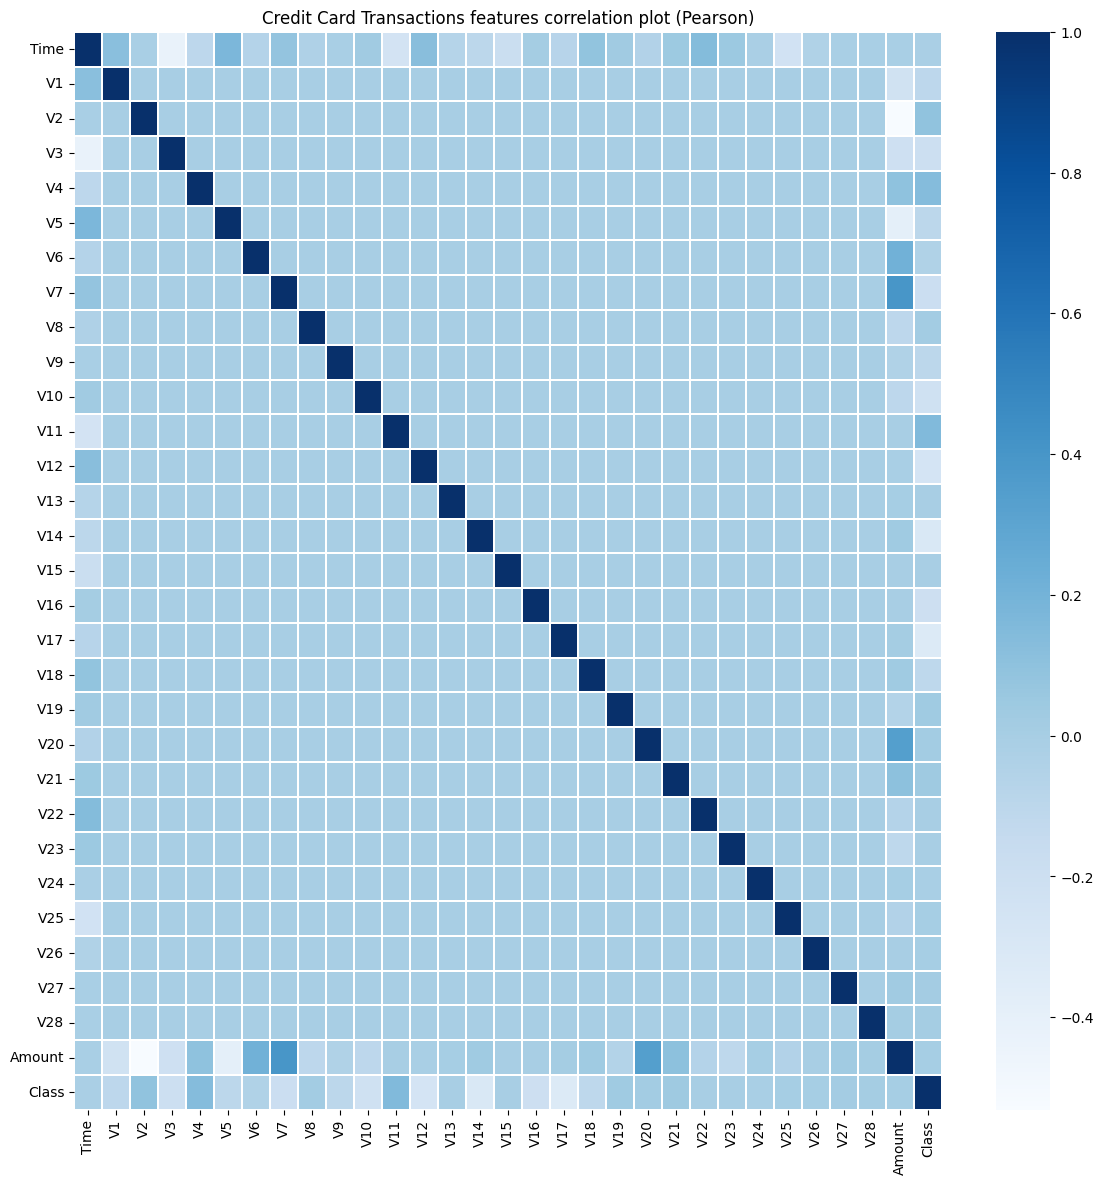

In [11]:
# Feature correlation matrix

plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr=df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Blues")
plt.show

We can see that there is not too much correlations

C:\Users\Paul\AppData\Local\Temp\ipykernel_30948\824060010.py:14: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

C:\Users\Paul\AppData\Local\Temp\ipykernel_30948\824060010.py:15: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



<Figure size 640x480 with 0 Axes>

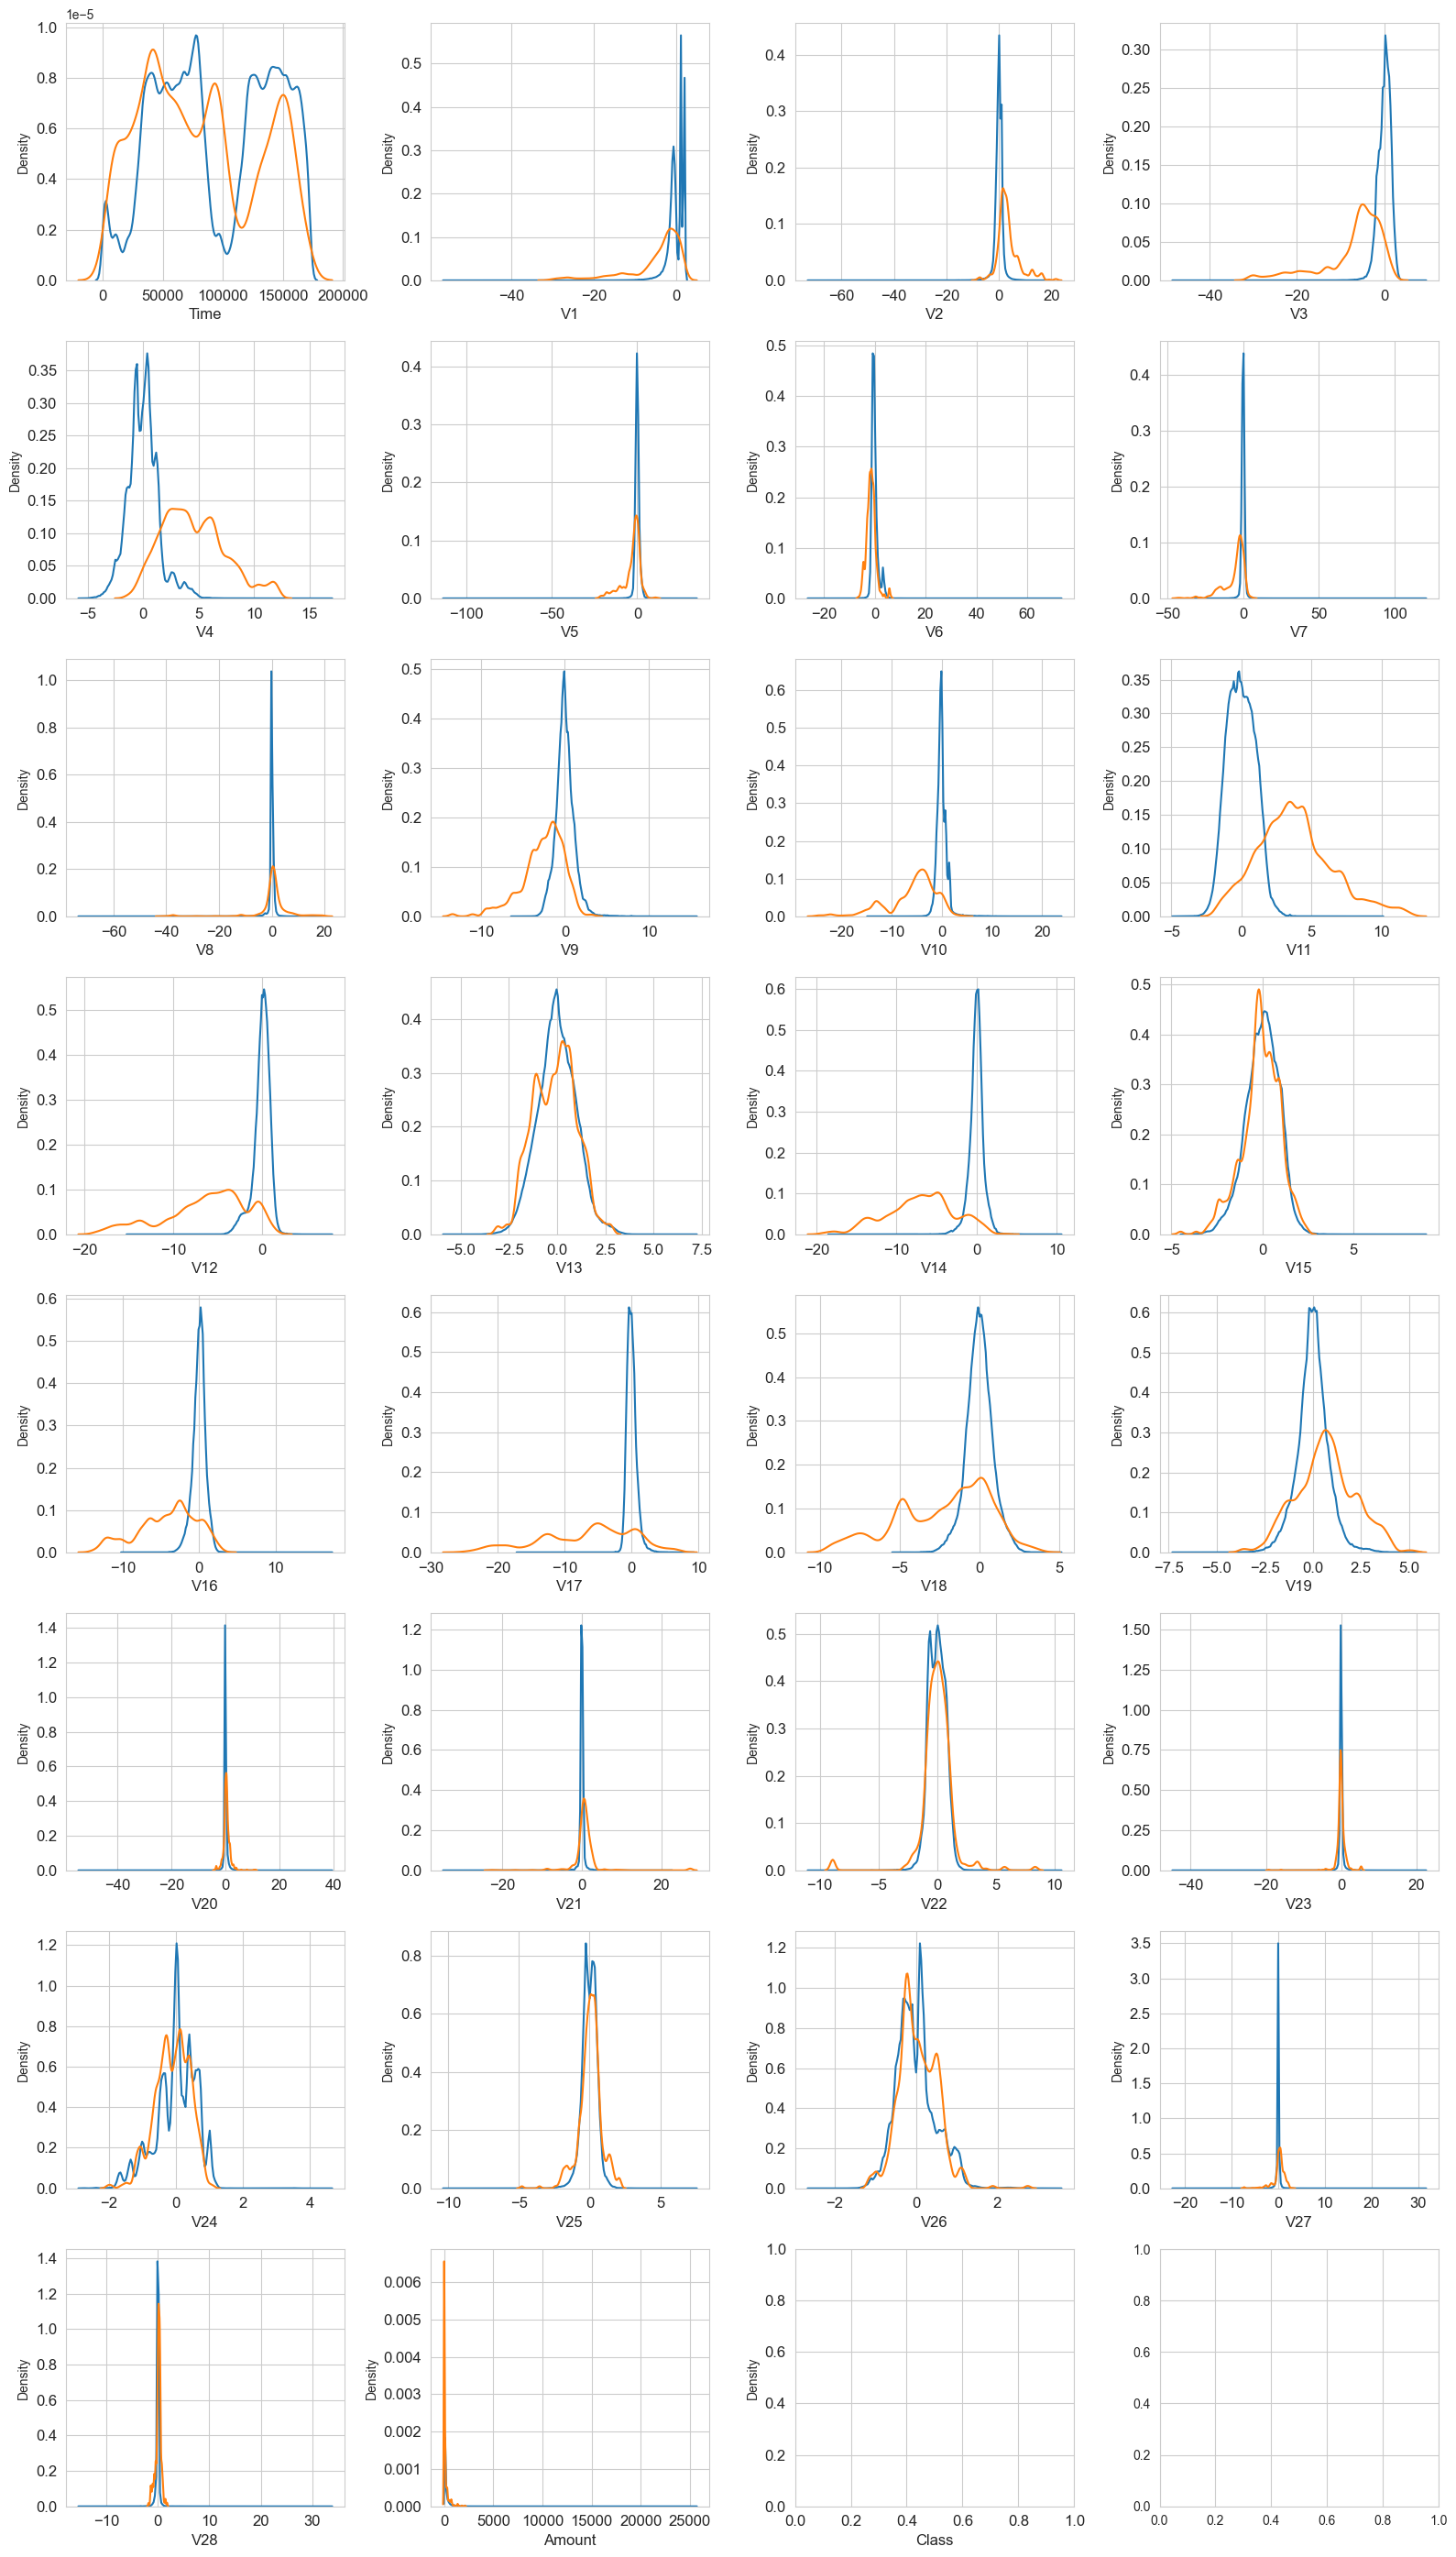

In [12]:
var = df.columns.values

i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8, 4, figsize=(16, 28))

for feature in var:
    i += 1
    plt.subplot(8, 4, i)
    sns.kdeplot(t0[feature], bw_adjust=0.5, label="Class = 0")
    sns.kdeplot(t1[feature], bw_adjust=0.5, label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    plt.tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
plt.show()


Several features demonstrate good discriminative power between the two Class values. In particular, V4 and V11 show clearly distinct distributions. Features like V12, V14, and V18 exhibit partial separation, while V1, V2, V3, and V10 display noticeably different shapes. Conversely, V25, V26, and V28 have very similar distributions for both classes.

Overall, with few exceptions such as Time and Amount, the distributions for legitimate transactions (Class = 0) are generally centered around zero, sometimes exhibiting a long tail at one end. In contrast, the fraudulent transactions (Class = 1) tend to follow skewed, asymmetric distributions.

# Training with ML models

In [13]:
#TODO :

# try with augmented data

In [14]:
# Config

VALID_SIZE = 0.20 
TEST_SIZE = 0.20 
NUM_FOLDS = 5 
SEED = 63 
MAX_ROUNDS = 1000 
EARLY_STOP = 50 
OPT_ROUNDS = 1000  
VERBOSE_EVAL = 50 
jobs=28
NUM_ESTIMATORS=100


In [15]:
target = 'Class'
features = df.columns.drop(target)

features

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [16]:
# Create datasets :

train_df, test_df = train_test_split(df, test_size=TEST_SIZE, random_state=SEED, shuffle=True)

train_df, valid_df = train_test_split(train_df, test_size=VALID_SIZE, random_state=SEED, shuffle=True)


In [17]:
def evaluate_model(name, y_true, y_pred, y_proba=None):
    print(f"\n=== {name} ===")
    
    # Basic metrics
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred, digits=4))
    
    # ROC AUC
    if y_proba is not None:
        print("ROC AUC Score:", roc_auc_score(y_true, y_proba))
    else:
        print("ROC AUC Score (from labels):", roc_auc_score(y_true, y_pred))
    
    # Precision-Recall AUC
    if y_proba is not None:
        precision, recall, _ = precision_recall_curve(y_true, y_proba)
        pr_auc = auc(recall, precision)
        print("Precision-Recall AUC:", pr_auc)
    
    # F1-score for minority class (assumed fraud = 1)
    print("F1-score (fraud class):", f1_score(y_true, y_pred, pos_label=1))
    
    # Kappa and MCC
    print("Cohen's Kappa:", cohen_kappa_score(y_true, y_pred))
    print("Matthews Corrcoef:", matthews_corrcoef(y_true, y_pred))


### Test some baisc models :

In [18]:
from sklearn.ensemble import RandomForestClassifier

clf_rdm = RandomForestClassifier(
    n_jobs=jobs,
    random_state=SEED,
    criterion='gini',
    n_estimators=NUM_ESTIMATORS,
    class_weight='balanced'  # Important pour le déséquilibre
)

clf_rdm.fit(train_df[features], train_df[target].values)


RandomForestClassifier(class_weight='balanced', n_jobs=28, random_state=63)

In [19]:
from sklearn.ensemble import AdaBoostClassifier

clf_ada = AdaBoostClassifier(
    n_estimators=NUM_ESTIMATORS,
    learning_rate=0.8,
    algorithm='SAMME',
    random_state=SEED
)

clf_ada.fit(train_df[features], train_df[target].values)


C:\Users\Paul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.



AdaBoostClassifier(algorithm='SAMME', learning_rate=0.8, n_estimators=100,
                   random_state=63)

In [20]:
from xgboost import XGBClassifier

clf_xgb = XGBClassifier(
    n_estimators=NUM_ESTIMATORS,
    learning_rate=0.1,
    max_depth=6,
    # scale_pos_weight=IRRATIO,  # 
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=SEED
)

clf_xgb.fit(train_df[features], train_df[target].values)


C:\Users\Paul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\core.py:158: UserWarning:

[10:21:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=63, ...)

In [21]:
from lightgbm import LGBMClassifier

clf_lgbm = LGBMClassifier(
    n_estimators=NUM_ESTIMATORS,
    learning_rate=0.1,
    class_weight='balanced',
    random_state=SEED
)

clf_lgbm.fit(train_df[features], train_df[target].values)


C:\Users\Paul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning:

Could not find the number of physical cores for the following reason:
[WinError 2] Le fichier spécifié est introuvable
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.

  File "C:\Users\Paul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.3568.0_x64__qbz5n2kfra8p0\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.3568.0_x64__qbz5n2k

[LightGBM] [Info] Number of positive: 314, number of negative: 181962
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005683 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 182276, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


LGBMClassifier(class_weight='balanced', random_state=63)

In [22]:
from sklearn.linear_model import LogisticRegression

clf_logreg = LogisticRegression(
    solver='lbfgs',
    max_iter=1000,
    class_weight='balanced',
    random_state=SEED
)

clf_logreg.fit(train_df[features], train_df[target].values)


C:\Users\Paul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(class_weight='balanced', max_iter=1000, random_state=63)

In [23]:
y_pred_rdm = clf_rdm.predict(valid_df[features])
y_proba_rdm = clf_rdm.predict_proba(valid_df[features])[:, 1]
evaluate_model("Random Forest", valid_df[target], y_pred_rdm, y_proba_rdm)



=== Random Forest ===
Accuracy: 0.9995391603941276
Confusion Matrix:
 [[45486     6]
 [   15    62]]
Classification Report:
               precision    recall  f1-score   support

           0     0.9997    0.9999    0.9998     45492
           1     0.9118    0.8052    0.8552        77

    accuracy                         0.9995     45569
   macro avg     0.9557    0.9025    0.9275     45569
weighted avg     0.9995    0.9995    0.9995     45569

ROC AUC Score: 0.9466605231574896
Precision-Recall AUC: 0.8206324513781339
F1-score (fraud class): 0.8551724137931035
Cohen's Kappa: 0.85494251734075
Matthews Corrcoef: 0.856599411254276


In [24]:
y_pred_ada = clf_ada.predict(valid_df[features])
y_proba_ada = clf_ada.predict_proba(valid_df[features])[:, 1]
evaluate_model("AdaBoost", valid_df[target], y_pred_ada, y_proba_ada)



=== AdaBoost ===
Accuracy: 0.9990344313019817
Confusion Matrix:
 [[45474    18]
 [   26    51]]
Classification Report:
               precision    recall  f1-score   support

           0     0.9994    0.9996    0.9995     45492
           1     0.7391    0.6623    0.6986        77

    accuracy                         0.9990     45569
   macro avg     0.8693    0.8310    0.8491     45569
weighted avg     0.9990    0.9990    0.9990     45569

ROC AUC Score: 0.9775884671031071
Precision-Recall AUC: 0.7111203201638605
F1-score (fraud class): 0.6986301369863014
Cohen's Kappa: 0.6981480321712717
Matthews Corrcoef: 0.6992018428910369


In [25]:
y_pred_xgb = clf_xgb.predict(valid_df[features])
y_proba_xgb = clf_xgb.predict_proba(valid_df[features])[:, 1]
evaluate_model("XGBoost", valid_df[target], y_pred_xgb, y_proba_xgb)



=== XGBoost ===
Accuracy: 0.9994952709078541
Confusion Matrix:
 [[45483     9]
 [   14    63]]
Classification Report:
               precision    recall  f1-score   support

           0     0.9997    0.9998    0.9997     45492
           1     0.8750    0.8182    0.8456        77

    accuracy                         0.9995     45569
   macro avg     0.9373    0.9090    0.9227     45569
weighted avg     0.9995    0.9995    0.9995     45569

ROC AUC Score: 0.9815283634856308
Precision-Recall AUC: 0.8093436079661537
F1-score (fraud class): 0.8456375838926175
Cohen's Kappa: 0.8453850911967837
Matthews Corrcoef: 0.8458630383075371


In [26]:
y_pred_lgbm = clf_lgbm.predict(valid_df[features])
y_proba_lgbm = clf_lgbm.predict_proba(valid_df[features])[:, 1]
evaluate_model("LightGBM", valid_df[target], y_pred_lgbm, y_proba_lgbm)



=== LightGBM ===
Accuracy: 0.9994513814215804
Confusion Matrix:
 [[45479    13]
 [   12    65]]
Classification Report:
               precision    recall  f1-score   support

           0     0.9997    0.9997    0.9997     45492
           1     0.8333    0.8442    0.8387        77

    accuracy                         0.9995     45569
   macro avg     0.9165    0.9219    0.9192     45569
weighted avg     0.9995    0.9995    0.9995     45569

ROC AUC Score: 0.9708794239261135
Precision-Recall AUC: 0.758392379746969
F1-score (fraud class): 0.8387096774193549
Cohen's Kappa: 0.8384349122693313
Matthews Corrcoef: 0.8384524215371861


In [27]:
y_pred_logreg = clf_logreg.predict(valid_df[features])
y_proba_logreg = clf_logreg.predict_proba(valid_df[features])[:, 1]
evaluate_model("Logistic Regression", valid_df[target], y_pred_logreg, y_proba_logreg)



=== Logistic Regression ===
Accuracy: 0.9720643419868771
Confusion Matrix:
 [[44226  1266]
 [    7    70]]
Classification Report:
               precision    recall  f1-score   support

           0     0.9998    0.9722    0.9858     45492
           1     0.0524    0.9091    0.0991        77

    accuracy                         0.9721     45569
   macro avg     0.5261    0.9406    0.5424     45569
weighted avg     0.9982    0.9721    0.9843     45569

ROC AUC Score: 0.9781909706401924
Precision-Recall AUC: 0.7966764207982585
F1-score (fraud class): 0.09907997169143666
Cohen's Kappa: 0.09619200821747076
Matthews Corrcoef: 0.21455637157576202


Random Forest: Best overall F1 (0.855), balanced precision/recall, low false positives. Strong generalist model.

XGBoost: Highest ROC AUC (0.982), slightly better recall than RF, comparable F1 (0.846).

LightGBM: Best recall (0.844), slightly lower precision, F1 close (0.839). Good for prioritizing fraud detection.

AdaBoost: Lower F1 (0.699), recall (0.662). Less effective on minority class.

Logistic Regression: Very high recall (0.91) but poor precision (0.05), F1 unusable (0.099). Overdetects fraud with many false positives.

**<span style="color:red">The other model could be better with K-Fold, but for a time-consuming question, I am only going to test K-Folds and Grid Search on RDM and XGBOOST</span>**


In [28]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

skf = StratifiedKFold(n_splits=NUM_FOLDS, shuffle=True, random_state=SEED)



In [29]:
param_grid_rdm = {
    'n_estimators': [100, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 10],
    'class_weight': ['balanced']
}

clf_rdm = RandomForestClassifier(n_jobs=jobs, random_state=SEED)

grid_rdm = GridSearchCV(
    estimator=clf_rdm,
    param_grid=param_grid_rdm,
    scoring='f1',
    cv=skf,
    verbose=1,
    n_jobs=jobs
)

grid_rdm.fit(train_df[features], train_df[target])
print("Best RF params:", grid_rdm.best_params_)
print("Best RF F1 score:", grid_rdm.best_score_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best RF params: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 300}
Best RF F1 score: 0.8386664168557886


In [30]:
# Compute scale_pos_weight from imbalance ratio
neg, pos = train_df[target].value_counts()
scale_pos_weight = neg / pos

param_grid_xgb = {
    'n_estimators': [100, 300],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1],
    'scale_pos_weight': [scale_pos_weight],
    'subsample': [0.8, 1.0]
}

clf_xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=SEED,
    n_jobs=jobs
)

grid_xgb = GridSearchCV(
    estimator=clf_xgb,
    param_grid=param_grid_xgb,
    scoring='f1',
    cv=skf,
    verbose=1,
    n_jobs=jobs
)

grid_xgb.fit(train_df[features], train_df[target])
print("Best XGB params:", grid_xgb.best_params_)
print("Best XGB F1 score:", grid_xgb.best_score_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


C:\Users\Paul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\core.py:158: UserWarning:

[10:28:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




Best XGB params: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 300, 'scale_pos_weight': 579.4968152866242, 'subsample': 0.8}
Best XGB F1 score: 0.8620576141942433


In [31]:
# 1. Get best model
best_rdm = grid_rdm.best_estimator_

# 2. Predict on the the test set
y_pred_test = best_rdm.predict(test_df[features])
y_proba_test = best_rdm.predict_proba(test_df[features])[:, 1]
evaluate_model("Random Forest - Best Model", test_df[target], y_pred_test, y_proba_test)





=== Random Forest - Best Model ===
Accuracy: 0.9994908886626171
Confusion Matrix:
 [[56857     4]
 [   25    76]]
Classification Report:
               precision    recall  f1-score   support

           0     0.9996    0.9999    0.9997     56861
           1     0.9500    0.7525    0.8398       101

    accuracy                         0.9995     56962
   macro avg     0.9748    0.8762    0.9198     56962
weighted avg     0.9995    0.9995    0.9995     56962

ROC AUC Score: 0.9725093031277767
Precision-Recall AUC: 0.8753560600780474
F1-score (fraud class): 0.8397790055248618
Cohen's Kappa: 0.8395274822269598
Matthews Corrcoef: 0.8452537895699885


In [32]:
import joblib

joblib.dump(best_rdm, "../models/best_random_forest_model.joblib")

['../models/best_random_forest_model.joblib']

# TODO NEXT : DATA AUGMENTATION AND RE EVALUATE ALL